Melissa Laurino <br>
3/30/2022<br>
Data Exploration with Vessel AIS Data<br>

In [1]:
print ('Last updated:')
import datetime
date = datetime.datetime.now()
print (date)

Last updated:
2022-04-16 08:39:51.893693


In [2]:
#Import necessary libraries:
import csv
import pandas as pd #Data import
import numpy as np #Math functions
import matplotlib.pyplot as plt #Graphing library

In [3]:
#Import 2020 AIS data using Pandas:
AIS = pd.read_csv('2020AISDATA.csv', low_memory=False)

In [5]:
#print (AIS)
#Data has [10368973 rows x 17 columns]

In [4]:
#Show the columns of the data:
print (AIS.columns)

Index(['MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG', 'Heading',
       'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status', 'Length',
       'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')


In [6]:
#Let's check the format of the MMSI column that will help us identify individual vessels in our data:
MMSI=AIS["MMSI"]
MMSI.head()

0    368016810
1    368016810
2    368016810
3    367131650
4    367398120
Name: MMSI, dtype: int64

In [7]:
n = len(pd.unique(AIS['MMSI']))
print("No.of.unique values :", n)
#3674 Unique MMSI numbers

No.of.unique values : 3674


In [8]:
#What does the data look like for a vessel we know - The American Star?
AIS[AIS.MMSI == 367552480]

,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TransceiverClass
1215290,367552480,2020-04-22T15:32:17,38.94972,-74.90893,0.0,309.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
1215291,367552480,2020-04-22T15:34:11,38.94970,-74.90893,0.0,309.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
1215292,367552480,2020-04-22T15:37:10,38.94970,-74.90893,0.0,309.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
1215293,367552480,2020-04-22T15:40:11,38.94971,-74.90892,0.0,309.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
1215294,367552480,2020-04-22T15:43:11,38.94971,-74.90892,0.0,309.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2541630,367552480,2020-11-11T18:39:38,38.95126,-74.88173,6.8,82.7,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
2587520,367552480,2020-02-29T16:26:46,38.97963,-74.83581,0.0,0.0,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
2587522,367552480,2020-02-29T16:28:41,38.97963,-74.83581,0.0,0.0,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B
2587525,367552480,2020-02-29T16:31:40,38.97963,-74.83581,0.0,0.0,511.0,AMERICAN STAR,NaN,WDG6001,60.0,NaN,24.0,NaN,NaN,NaN,B


In [10]:
#Take a subset of the data to only view one vessel.
#Let's test it out with our known vessels:
AmStar = AIS[(AIS.MMSI==367552480)]
AtlStar = AIS [(AIS.MMSI==368146270)]
AmStar.head
#print (AmStar)
#print (AtlStar)

<bound method NDFrame.head of               MMSI         BaseDateTime       LAT       LON  SOG    COG  \
1215290  367552480  2020-04-22T15:32:17  38.94972 -74.90893  0.0  309.7   
1215291  367552480  2020-04-22T15:34:11  38.94970 -74.90893  0.0  309.7   
1215292  367552480  2020-04-22T15:37:10  38.94970 -74.90893  0.0  309.7   
1215293  367552480  2020-04-22T15:40:11  38.94971 -74.90892  0.0  309.7   
1215294  367552480  2020-04-22T15:43:11  38.94971 -74.90892  0.0  309.7   
...            ...                  ...       ...       ...  ...    ...   
2541630  367552480  2020-11-11T18:39:38  38.95126 -74.88173  6.8   82.7   
2587520  367552480  2020-02-29T16:26:46  38.97963 -74.83581  0.0    0.0   
2587522  367552480  2020-02-29T16:28:41  38.97963 -74.83581  0.0    0.0   
2587525  367552480  2020-02-29T16:31:40  38.97963 -74.83581  0.0    0.0   
2587528  367552480  2020-02-29T16:34:40  38.97962 -74.83581  0.0    0.0   

         Heading     VesselName  IMO CallSign  VesselType  Status  Le

In [11]:
#Take a subset of the data to only view one vessel:
#Now let's try some Menhaden Reduction vessels:
Tide = AIS[(AIS.MMSI==367108820)]
Calc = AIS[(AIS.MMSI==367108810)]
#John = AIS[(AIS.MMSI==367108780)] #Not present in 2019
Cock = AIS[(AIS.MMSI==367772272)]
Wind = AIS[(AIS.MMSI==367772250)]
#Reed = AIS[(AIS.MMSI==367108860)] #Not present in 2019

#Combine four vessels into one datasheet quickly using Terminal on Mac: https://serp.co/blog/combine-merge-csv-files-mac/ 

In [12]:
#Import combined data to double check work:
FourVessels = pd.read_csv('FourVesselsCombined2020.csv', low_memory=False)

In [13]:
FourVessels.head
n = len(pd.unique(FourVessels['MMSI']))
print("No.of.unique values :", n)
#5 Unique MMSI numbers - Looks good - Perhaps 5 and not 4 due to blank values?

No.of.unique values : 5


In [14]:
#Which boats are used in our defined area?
print (Tide) #Yes
print (Calc) #Yes
#print (John) #NO
print (Cock) #Yes
print (Wind) #Yes
#print (Reed) #NO

              MMSI         BaseDateTime       LAT       LON   SOG    COG  \
1411319  367108820  2020-10-02T09:25:08  38.93645 -75.10623  12.1  154.3   
1411320  367108820  2020-10-02T09:26:18  38.93291 -75.10408  12.1  153.2   
1411321  367108820  2020-10-02T09:39:26  38.89177 -75.08109  12.4  156.1   
1411322  367108820  2020-10-02T09:41:16  38.88592 -75.07794  12.3  158.9   
1411323  367108820  2020-10-02T09:56:36  38.83929 -75.05033  11.5  148.4   
...            ...                  ...       ...       ...   ...    ...   
2296876  367108820  2020-09-08T17:25:07  38.74543 -74.89430  11.7  187.7   
2296877  367108820  2020-09-08T17:26:58  38.73954 -74.89527  11.4  189.8   
2296879  367108820  2020-09-08T17:28:07  38.73587 -74.89586  11.6  190.7   
2296880  367108820  2020-09-08T17:29:18  38.73204 -74.89651  11.4  188.0   
2296881  367108820  2020-09-08T17:30:27  38.72835 -74.89714  11.8  188.1   

         Heading VesselName         IMO CallSign  VesselType  Status  Length  \
1411319

In [109]:
#Save data frame to a new CSV file:
#AmStar.to_csv('AmericanStarAIS2020.csv')

#Save data frame to a new CSV file with only specific columns:
#df = pd.read_csv("AmericanStarAIS2020.csv", usecols = ['MMSI','LAT', 'LON', 'VesselName'])
#print (df)
#df.to_csv('AmericanStar2020LatLon.csv')

In [16]:
#Save data frame to a new CSV file:
#Calc.to_csv('CalcAIS2020.csv') - Worked
#Tide.to_csv('TideAIS2020.csv')
#Cock.to_csv('CockAIS2020.csv')
#Wind.to_csv('WindAIS2020.csv')

In [89]:
#Let's try with another data file:

In [16]:
#Import 2019 AIS data using Pandas
AIS2019 = pd.read_csv('2019AISData.csv', low_memory=False)

In [17]:
#print (AIS2.columns)

In [18]:
#Take a subset of the data to only view one vessel:
AmStar2019 = AIS2019[(AIS2019.MMSI==367552480)]

In [19]:
print (AmStar2019)

              MMSI         BaseDateTime       LAT       LON   SOG    COG  \
1700583  367552480  2019-02-08T21:10:28  38.97962 -74.83584   0.0    0.0   
1700584  367552480  2019-02-08T21:12:21  38.97961 -74.83583   0.0    0.0   
1700585  367552480  2019-02-08T21:15:22  38.97961 -74.83583   0.0    0.0   
1700586  367552480  2019-02-08T21:18:22  38.97961 -74.83583   0.0    0.0   
1700587  367552480  2019-02-08T21:21:22  38.97960 -74.83582   0.0    0.0   
...            ...                  ...       ...       ...   ...    ...   
1777331  367552480  2019-11-03T18:19:05  38.94818 -74.87331  11.6  144.9   
1777332  367552480  2019-11-03T18:20:06  38.94540 -74.87113  11.7  150.2   
1777333  367552480  2019-11-03T18:21:35  38.94110 -74.86768  12.3  148.0   
1777335  367552480  2019-11-03T18:22:36  38.93824 -74.86524  11.7  148.1   
1777336  367552480  2019-11-03T18:23:37  38.93545 -74.86390   9.9  214.3   

         Heading     VesselName  IMO CallSign  VesselType  Status  Length  \
1700583   

In [52]:
#Take a subset of the data to only view one vessel:
#Now let's try some Menhaden Reduction vessels:
Tide2019 = AIS2019[(AIS2019.MMSI==367108820)]
Calc2019 = AIS2019[(AIS2019.MMSI==367108810)]
John2019 = AIS2019[(AIS2019.MMSI==367108780)]
Cock2019 = AIS2019[(AIS2019.MMSI==367772272)]
Wind2019 = AIS2019[(AIS2019.MMSI==367772250)]
Reed2019 = AIS2019[(AIS2019.MMSI==367108860)]

In [53]:
#Which boats are used in our defined area?
print (Tide2019) #Yes
print (Calc2019) #Yes
print (John2019) #YeS
print (Cock2019) #Yes
print (Wind2019) #Yes
#print (Reed2019) #NO

              MMSI         BaseDateTime       LAT       LON   SOG    COG  \
2124097  367108820  2019-07-15T10:17:34  38.77574 -74.85520  12.2   22.7   
2124098  367108820  2019-07-15T10:19:34  38.78188 -74.85159  12.2   18.0   
2124100  367108820  2019-07-15T10:20:45  38.78576 -74.85000  12.3   18.7   
2124101  367108820  2019-07-15T10:22:03  38.79008 -74.84813  12.4   17.6   
2124103  367108820  2019-07-15T10:23:13  38.79392 -74.84649  12.6   18.6   
...            ...                  ...       ...       ...   ...    ...   
2133528  367108820  2019-08-05T11:01:07  38.79283 -74.85125  12.8  192.7   
2133530  367108820  2019-08-05T11:02:26  38.78825 -74.85236  12.6  193.1   
2133531  367108820  2019-08-05T11:03:36  38.78417 -74.85350  12.9  193.5   
2133533  367108820  2019-08-05T11:04:46  38.78016 -74.85452  12.8  191.7   
2133534  367108820  2019-08-05T11:05:55  38.77610 -74.85569  12.7  200.7   

         Heading VesselName         IMO CallSign  VesselType  Status  Length  \
2124097

In [56]:
#Save data frame to a new CSV file:
#Calc2019.to_csv('CalcAIS2019.csv') #- Worked
#Tide2019.to_csv('TideAIS2019.csv')
#John2019.to_csv('JohnAIS2019.csv')
#Cock2019.to_csv('CockAIS2019.csv')
#Wind2019.to_csv('WindAIS2019.csv')

#Combine four vessels into one datasheet quickly using Terminal on Mac: https://serp.co/blog/combine-merge-csv-files-mac/ 
#Combine Years 2019 & 2020 using Terminal on Mac

Heatmap 

In [18]:
#Let's create a heat map to visualize high density vessel traffic areas:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import combined 2019 & 2020 specified vessel track data:
AIS20192020 = pd.read_csv('CombinedVesselAIS2019_2020.csv', low_memory=False)
#print(AIS20192020)
print(AIS20192020.columns)

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')


In [51]:
#Plot the historgram:
#x = np.random.rayleigh(50, size=5000)
#y = np.random.rayleigh(50, size=5000)
#x = AIS20192020[(AIS20192020.LAT)]
x = AIS20192020.LON
y = AIS20192020.LAT

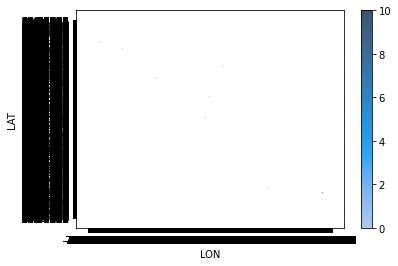

In [91]:
ax = sns.histplot(data=AIS20192020, x="LON", y="LAT", bins=100, cbar=True)

In [57]:
#plt.hist2d(x,y, bins=10) 
#bins=[np.arange(-74.00,-75.00,5),np.arange(38.00,40.00,5)])
#bins=[np.arange(-74.00,-75.00,5),np.arange(38.00,40.00,5)])
#plt.show()

(array([[5066., 5001., 4494., 3671., 3274.,    0.,    0.,    0.,    0.,
            0.],
        [   0.,    0.,    0.,    0.,  554., 4897., 4496., 4240., 3604.,
         3715.]]),
 array([    0. ,  2794.9,  5589.8,  8384.7, 11179.6, 13974.5, 16769.4,
        19564.3, 22359.2, 25154.1, 27949. ]),
 <a list of 2 BarContainer objects>)

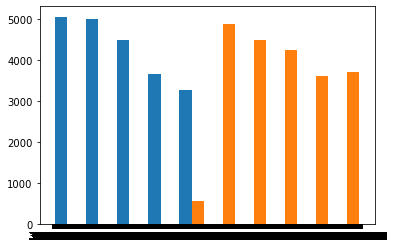

In [89]:
df = pd.read_csv('CombinedVesselAIS2019_2020.csv', 
                 usecols=[3,4], names=['LAT', 'LON'], 
                 skiprows=1)
y=pd.read_csv('CombinedVesselAIS2019_2020.csv', 
                 usecols=[3], names=['LAT'], 
                 skiprows=1)
x=pd.read_csv('CombinedVesselAIS2019_2020.csv', 
                 usecols=[4], names=['LON'], 
                 skiprows=1)
plt.hist(df)

ConversionError: Failed to convert value(s) to axis units:             LAT        LON
0      38.77682  -74.85453
1      38.78349  -74.85151
2      38.78728   -74.8499
3      38.79263  -74.84789
4      38.79698  -74.84624
...         ...        ...
21501  38.74621  -74.79506
21502  38.74235  -74.79666
21503  38.73869  -74.79816
21504  38.73271  -74.80071
21505  38.72906  -74.80226

[21506 rows x 2 columns]

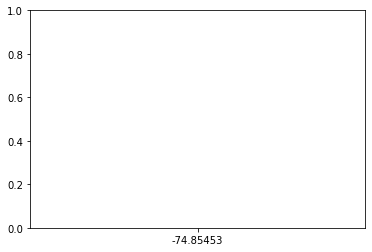

In [88]:
plt.hist2d(x,y,df)
plt.show()

Learning more about our data:

In [3]:
#Import combined 2019 & 2020 specified vessel track data:
AIS20192020 = pd.read_csv('CombinedVesselAIS2019_2020.csv', low_memory=False)
#print(AIS20192020)
print(AIS20192020.columns)

Index(['Unnamed: 0', 'MMSI', 'BaseDateTime', 'LAT', 'LON', 'SOG', 'COG',
       'Heading', 'VesselName', 'IMO', 'CallSign', 'VesselType', 'Status',
       'Length', 'Width', 'Draft', 'Cargo', 'TransceiverClass'],
      dtype='object')


In [5]:
#For this data set, they have combined both Date and Time in the same column. We want to separate the date from the time to examine the different months of occurence:
AIS20192020.BaseDateTime

0        2019-07-15T10:24:04
1        2019-07-15T10:26:14
2        2019-07-15T10:27:25
3        2019-07-15T10:29:05
4        2019-07-15T10:30:25
                ...         
21501    2020-10-14T13:16:05
21502    2020-10-14T13:17:16
21503    2020-10-14T13:18:24
21504    2020-10-14T13:20:16
21505    2020-10-14T13:21:24
Name: BaseDateTime, Length: 21506, dtype: object

In [32]:
#To split into multiple columns by delimiter: https://datascienceparichay.com/article/pandas-split-column-by-delimiter/
AIS20192020['BaseDateTime'].str.split('T', expand=True)
# Split column and add new columns to df
AIS20192020[['Date', 'Time']] = AIS20192020['BaseDateTime'].str.split('T', expand=True)
# Display the NEW dataframe - Date and Time are now separated.
AIS20192020.Date

0        2019-07-15
1        2019-07-15
2        2019-07-15
3        2019-07-15
4        2019-07-15
            ...    
21501    2020-10-14
21502    2020-10-14
21503    2020-10-14
21504    2020-10-14
21505    2020-10-14
Name: Date, Length: 21506, dtype: object

In [33]:
#s.dt.date.value_counts()
AIS20192020.Date.value_counts()

2020-10-03    2073
2020-10-02    1910
2020-07-27    1420
2020-06-22    1346
2020-08-31    1267
2020-06-29    1104
2020-08-24    1073
2019-07-15    1073
2020-10-06    1015
2020-08-21     764
2020-08-20     750
2020-10-09     686
2020-09-08     629
2020-07-14     561
2020-08-28     556
2020-10-14     472
2020-08-23     458
2020-08-18     446
2020-08-19     438
2020-07-06     420
2020-09-04     402
2020-06-01     378
2020-08-25     349
2020-06-23     301
2020-09-28     272
2020-09-16     188
2020-06-08     184
2020-07-13     162
2019-07-29     160
2019-07-18     153
2019-07-17     118
2020-07-28      97
2019-08-05      90
2019-06-20      86
2020-09-17      37
2020-07-01      27
2020-09-26      18
2020-09-27      15
BaseDate         8
Name: Date, dtype: int64

In [29]:

#df = pd.AIS20192020({'Date': pd.date_range(start='01-01-2019', end='31-12-2020')})
df = pd.DataFrame({'AIS20192020.Date': pd.date_range(start='01-01-2019', end='31-12-2020')})
#df.set_index('AIS20192020.Date').resample('M').size()
df['AIS20192020.Date].groupby(df.Date.dt.to_period("M")).agg('count'

SyntaxError: invalid syntax (514423315.py, line 4)